# ANÁLISIS EXPLORATORIO DE DATOS - Sector Telecomunicaciones - Internet

En este notebook se presentará un **análisis exploratorio de datos** referentes al sector de telecomunicaciones, mas específicamente al **servicio de Internet en la República Argentina**.

En primer lugar, importamos las librerías con las que vamos a trabajar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

Los datos con los que vamos a trabajar fueron descargados de la siguiente [página](https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/).

A continuación se realiza la carga y análisis exploratorio de los mismos:

## Accesos por Hogares - Provincias:

In [2]:
# Se cargan los datos en un dataframe de Pandas, se consulta la cantidad de filas y columnas y los primeros 5 registros:
acc_hog_pcias = pd.read_excel(r"Datasets/Internet_Penetracion.xlsx", sheet_name="Hogares")
print(acc_hog_pcias.shape)
acc_hog_pcias.head()

(864, 4)


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


> Este dataset incluye información sobre los **accesos a Internet cada 100 hogares** por Provincia y por Trimestre, desde el año 2014 al 2022.

In [3]:
# Se controlan características generales del dataset:
acc_hog_pcias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Se renombra la columna "Accesos por cada 100 hogares" por otro más corto:

In [4]:
acc_hog_pcias = acc_hog_pcias.rename(columns = {"Accesos por cada 100 hogares" : "Accesos_Hogares"})
acc_hog_pcias.head()

,Año,Trimestre,Provincia,Accesos_Hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


In [5]:
# Se controla si existen valores faltantes:
acc_hog_pcias.isnull().sum()

Año                0
Trimestre          0
Provincia          0
Accesos_Hogares    0
dtype: int64

In [6]:
# Se controla si existen valores duplicados:
acc_hog_pcias.duplicated().sum()

0

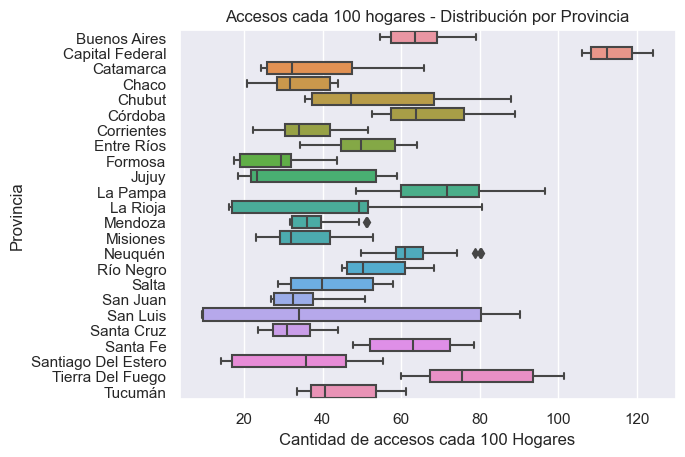

In [7]:
# Se buscan valores atípicos o outliers en la variable numérica a través de un boxplot
sns.boxplot(data = acc_hog_pcias, x ='Accesos_Hogares', y = 'Provincia')
plt.title('Accesos cada 100 hogares - Distribución por Provincia')
plt.xlabel('Cantidad de accesos cada 100 Hogares')
plt.show()

Podemos observar que el dataframe no posee valores nulos ni duplicados. Sin embargo, en algunas provincias se observan valores que podrían considerarse outliers porque superan el rango intercuartílico, pero no necesariamente es así, ya que por ejemplo en Mendoza y Neuquén, los valores aún se encuentran por debajo de los 100 accesos.

Los valores que llaman la atención son los de Capital Federal, donde todos los valores superan los 100 accesos, es decir que todos los hogares tendrían acceso a Internet, lo cual no necesariamente es así ya que también puede darse el caso de que existan hogares con más de un acceso y otros hogares sin, por lo que indagamos un poco más:

In [8]:
acc_hog_pcias[acc_hog_pcias["Provincia"] == "Capital Federal"].head(8)

,Año,Trimestre,Provincia,Accesos_Hogares
1,2022,4,Capital Federal,122.730000
25,2022,3,Capital Federal,122.280000
49,2022,2,Capital Federal,121.310000
73,2022,1,Capital Federal,111.797863
97,2021,4,Capital Federal,111.270026
121,2021,3,Capital Federal,111.271055
145,2021,2,Capital Federal,110.144402
169,2021,1,Capital Federal,108.419939


Se observa que efectivamente en los últimos dos años los accesos a Internet superaron a los 100 hogares, y a su vez se entiende que la medición en cada trimestre es **estática** y por ende los valores no son acumulativos, por lo que si necesitamos consultar el **índice** de accesos **anual**, se puede tomar el valor del **4° Trimestre**.

Controlamos la evolución de los accesos por año:

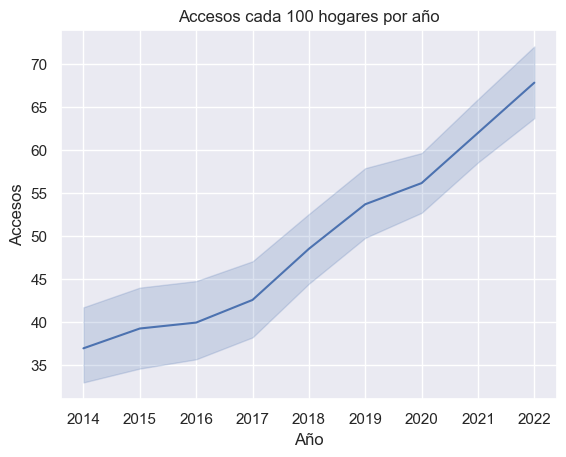

In [9]:
sns.lineplot(data = acc_hog_pcias, y ='Accesos_Hogares', x ='Año')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Accesos cada 100 hogares por año')
plt.show()

Complementamos con los accesos a Internet para el año 2022:

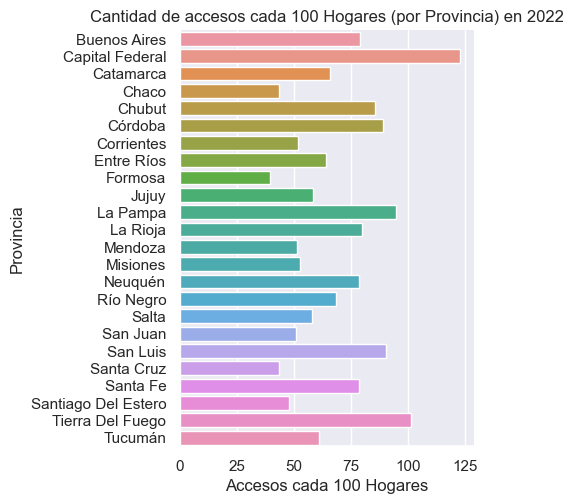

In [10]:
# En primer lugar, filtramos el dataset
acc_hog_pcias_2022 = acc_hog_pcias[(acc_hog_pcias["Año"] == 2022) & (acc_hog_pcias["Trimestre"] == 4)]

# Visualizamos:
sns.catplot(data = acc_hog_pcias_2022, x ='Accesos_Hogares', y='Provincia', kind='bar', dodge=True)
plt.xlabel('Accesos cada 100 Hogares')
plt.title('Cantidad de accesos cada 100 Hogares (por Provincia) en 2022') 
plt.show()

Observamos que la tasa de **accesos a Internet** por hogar **viene creciendo constantemente** con el transcurrir de los años, pero al observar los valores del año 2022 encontramos que provincias como **Chaco, Formosa, Santa Cruz y Santiago del Estero** tienen **menos de 50 accesos** a Internet **cada 100 Hogares**.

In [11]:
# Por último, se exporta el dataset modificado a un archivo "csv"
acc_hog_pcias.to_csv("Accesos_Hogar_Pcias.csv")

## Acceso por Bandas - Provincias:

In [12]:
accesos_pcias_bandas = pd.read_excel(r"Datasets/Internet_BAF.xlsx", sheet_name="Dial_BAF")
print(accesos_pcias_bandas.shape)
accesos_pcias_bandas.head()

(864, 6)


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


> Este dataset incluye información sobre los **accesos a Internet por tipo de Banda** por Provincia y por Trimestre, desde el año 2014 al 2022.

In [13]:
# Se controlan características generales del dataset:
accesos_pcias_bandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [14]:
# Se controla si existen valores faltantes:
accesos_pcias_bandas.isnull().sum()

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64

In [15]:
# Se controla cuales son los valores faltantes:
accesos_pcias_bandas[accesos_pcias_bandas["Dial up"].isnull()]

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
440,2018,2,Formosa,44554,NaN,44554
445,2018,2,Misiones,106147,NaN,106147


In [16]:
# Se reemplazan los valores faltantes por cero:
accesos_pcias_bandas["Dial up"] = accesos_pcias_bandas["Dial up"].fillna(0)
accesos_pcias_bandas[accesos_pcias_bandas["Dial up"].isnull()]

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total


In [17]:
# Se controla si existen valores duplicados:
accesos_pcias_bandas.duplicated().sum()

0

In [18]:
# Se modifica el dataframe para simplificar la visualización:
accesos_pcias_bandas = accesos_pcias_bandas.drop(columns= "Total")      # se elimina la columna total
accesos_pcias_bandas = accesos_pcias_bandas.melt(id_vars=['Año', 'Trimestre', 'Provincia'],     # se pasan las columnas a filas
                                                 var_name='Tipo_Banda', value_name='Accesos')
accesos_pcias_bandas.head()

,Año,Trimestre,Provincia,Tipo_Banda,Accesos
0,2022,4,Buenos Aires,Banda ancha fija,4788466.0
1,2022,4,Capital Federal,Banda ancha fija,1549781.0
2,2022,4,Catamarca,Banda ancha fija,70908.0
3,2022,4,Chaco,Banda ancha fija,143658.0
4,2022,4,Chubut,Banda ancha fija,167855.0


In [19]:
# Se chequea la info gral del nuevo dataframe:
accesos_pcias_bandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         1728 non-null   int64  
 1   Trimestre   1728 non-null   int64  
 2   Provincia   1728 non-null   object 
 3   Tipo_Banda  1728 non-null   object 
 4   Accesos     1728 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 67.6+ KB


Una vez tenemos listo y acomodado el dataset procedemos con las visualizaciones:

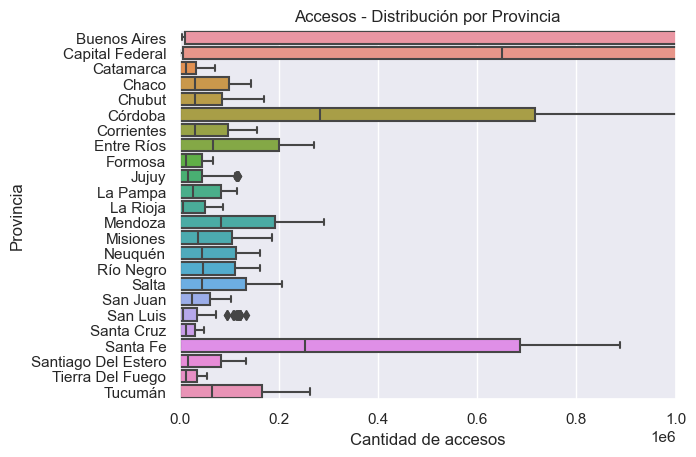

In [20]:
# Se buscan valores atípicos o outliers en la variable numérica a través de un boxplot
sns.boxplot(data = accesos_pcias_bandas, x ='Accesos', y = 'Provincia')
plt.xlim(0, 1000000)        # se achican los ejes para mejorar la visualización
plt.xlabel('Cantidad de accesos')
plt.title('Accesos - Distribución por Provincia')
plt.show()

Como podemos ver, provincias como Buenos Aires, Capital Federal, Córdoba, Santa Fe y Tucumán son las que más dispersión tienen en sus datos.

Por otro lado, en San Luis pareciera que existen valors atípicos, por lo que indagamos mas a fondo:

In [21]:
accesos_pcias_bandas[accesos_pcias_bandas["Provincia"] == "San Luis"].head(12)

,Año,Trimestre,Provincia,Tipo_Banda,Accesos
18,2022,4,San Luis,Banda ancha fija,135028.0
42,2022,3,San Luis,Banda ancha fija,121888.0
66,2022,2,San Luis,Banda ancha fija,121559.0
90,2022,1,San Luis,Banda ancha fija,119659.0
114,2021,4,San Luis,Banda ancha fija,118662.0
138,2021,3,San Luis,Banda ancha fija,117716.0
162,2021,2,San Luis,Banda ancha fija,122670.0
186,2021,1,San Luis,Banda ancha fija,119006.0
210,2020,4,San Luis,Banda ancha fija,119287.0
234,2020,3,San Luis,Banda ancha fija,116417.0


In [22]:
accesos_pcias_bandas[accesos_pcias_bandas["Provincia"] == "San Luis"].max()

Año               2022
Trimestre            4
Provincia     San Luis
Tipo_Banda     Dial up
Accesos       135028.0
dtype: object

In [23]:
accesos_pcias_bandas[accesos_pcias_bandas["Provincia"] == "San Luis"].min()

Año                       2014
Trimestre                    1
Provincia             San Luis
Tipo_Banda    Banda ancha fija
Accesos                  148.0
dtype: object

Se observa que el valor máximo se corresponde con el cierre del último año y que el valor mínimo con el inicio del primer año, por lo que suponiendo que el acceso a internet fue incrementando con el transcurrir de los años, no necesariamente se trata de valores atípicos.

Luego observamos la evolución cantidad de accesos por año y tipo de banda:

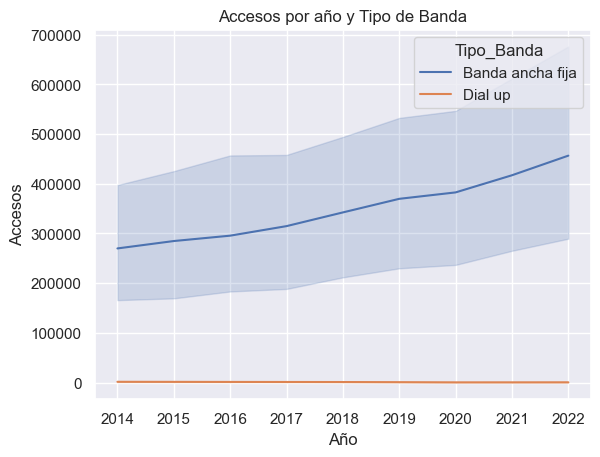

In [24]:
sns.lineplot(data = accesos_pcias_bandas, y ='Accesos', x ='Año', hue = "Tipo_Banda")
#plt.ylim(0, 20000)
plt.xlabel('Año') 
plt.title('Accesos por año y Tipo de Banda')
plt.show()

De acuerdo a lo expuesto en el gráfico anterior, la conexión por **Banda Ancha** viene **creciendo** con el transcurrir de los **años**, mientras que las conexiones por Dial up se encuentran cercanas a cero.

Observamos la cantidad de accesos por tipo de banda:

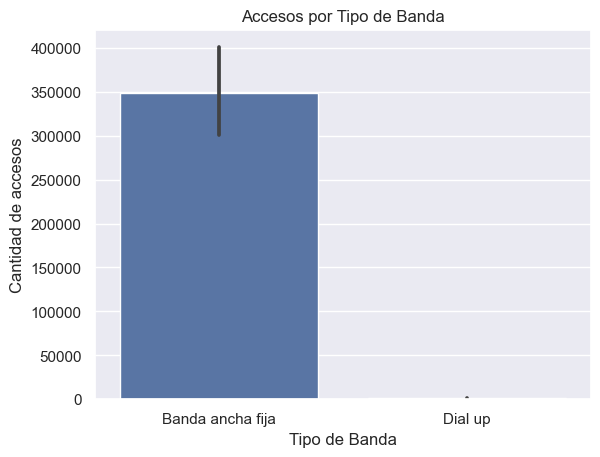

In [25]:
sns.barplot(data=accesos_pcias_bandas, x = "Tipo_Banda", y="Accesos")
plt.xlabel('Tipo de Banda')
plt.ylabel('Cantidad de accesos') 
plt.title('Accesos por Tipo de Banda')
plt.show()

Luego observamos la cantidad de accesos por provincia y tipo de banda:

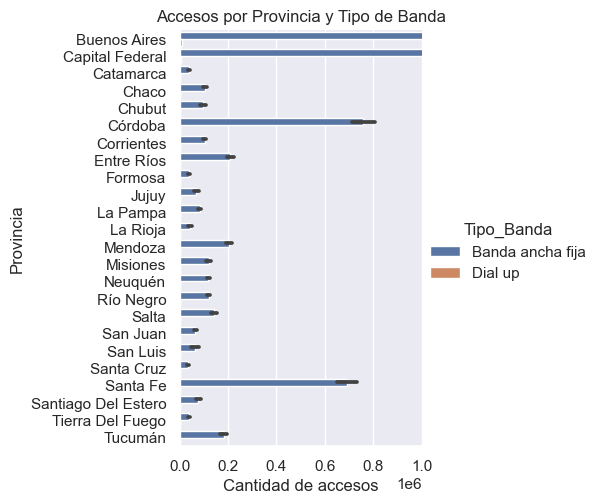

In [26]:
sns.catplot(data = accesos_pcias_bandas, x ='Accesos', y='Provincia', kind='bar', dodge=True, hue = "Tipo_Banda")
plt.xlim(0, 1000000)
plt.xlabel('Cantidad de accesos') 
plt.title('Accesos por Provincia y Tipo de Banda')
plt.show()

Observamos que en casi todas las provincias también la conexión por **Banda Ancha supera ampliamente** a la conexión por Dial up, por lo que se concluye que las **conexiones** por **Dial up** son **casi inexistentes**.

In [27]:
# Por último, se exporta el dataset modificado a un archivo "csv"
accesos_pcias_bandas.to_csv("Accesos_Pcias_Bandas.csv")

## Accesos por Tecnología - Provincias:

In [28]:
accesos_pcias_tec = pd.read_excel(r"Datasets/Accesos_por_tecnologia.xlsx", sheet_name="Accesos")
print(accesos_pcias_tec.shape)
accesos_pcias_tec.head()

(866, 9)


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0


> Este dataset incluye información sobre los **accesos a Internet por tipo de tecnología** utilizada en la conexión, por Provincia y por Trimestre, desde el año 2014 al 2022.

In [29]:
# Se controlan características generales del dataset:
accesos_pcias_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 61.0+ KB


In [30]:
# Se controla si existen valores faltantes:
accesos_pcias_tec.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [31]:
# Se controla cuales son los valores faltantes en "año":
accesos_pcias_tec[accesos_pcias_tec['Año'].isnull()]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Se controla cuales son los valores faltantes en "Provincia":
accesos_pcias_tec[accesos_pcias_tec['Provincia'].isnull()]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ya que las columnas con valores nulos no aportan información importante, se eliminan del análisis:

In [33]:
accesos_pcias_tec = accesos_pcias_tec.dropna()

In [34]:
# Se controla si existen valores duplicados:
accesos_pcias_tec.duplicated().sum()

0

Se controlan los valores únicos en "año":

In [35]:
accesos_pcias_tec["Año"].unique()

array([2022, 2021, 2020, 2019, '2019 *', 2018, 2017, 2016, 2015, 2014],
      dtype=object)

Se controlan valores únicos en "Trimestre":

In [36]:
accesos_pcias_tec["Trimestre"].unique()

array([4, 3, 2, 1, '3 *', '2 *', '1 *'], dtype=object)

Observamos que tanto la columna "Año" como "Trimestre" contienen valores de tipo string, por lo que se realiza la corrección correspondiente:

In [37]:
# Se crea una función para convertir los valores a enteros:
def convertir_valor(valor):
    if type(valor) == str:
        valor = valor.replace(" *", "")
        return int(valor)
    else:
        return valor

In [38]:
# Se corrige la columna "Año"
accesos_pcias_tec["Año"] = accesos_pcias_tec["Año"].apply(convertir_valor)
# Se corrige la columna "Trimestre"
accesos_pcias_tec["Trimestre"] = accesos_pcias_tec["Trimestre"].apply(convertir_valor)

In [39]:
# Se modifica el dataframe para simplificar la visualización:
accesos_pcias_tec = accesos_pcias_tec.drop(columns= "Total")              # se elimina la columna total
accesos_pcias_tec = accesos_pcias_tec.melt(id_vars=['Año', 'Trimestre', 'Provincia'],   # se pasan las columnas a filas
                                   var_name='Tecnología', value_name='Accesos')
accesos_pcias_tec.head()

,Año,Trimestre,Provincia,Tecnología,Accesos
0,2022,4,Buenos Aires,ADSL,325908.0
1,2022,4,Capital Federal,ADSL,138753.0
2,2022,4,Catamarca,ADSL,8952.0
3,2022,4,Chaco,ADSL,24582.0
4,2022,4,Chubut,ADSL,45450.0


In [40]:
# Se chequea la info gral del nuevo dataframe:
accesos_pcias_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         4320 non-null   int64  
 1   Trimestre   4320 non-null   int64  
 2   Provincia   4320 non-null   object 
 3   Tecnología  4320 non-null   object 
 4   Accesos     4320 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 168.9+ KB


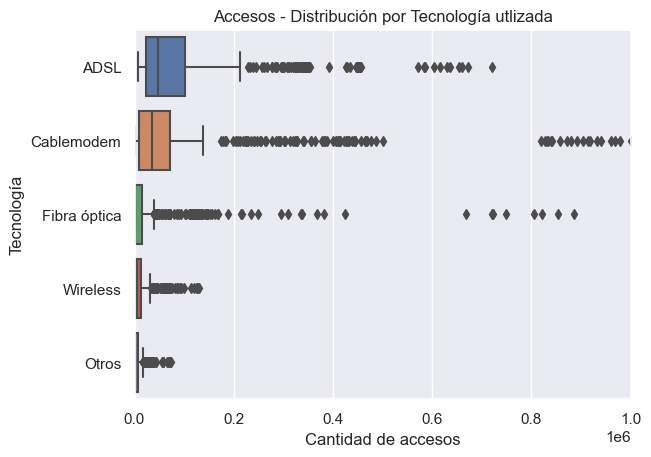

In [41]:
# Se buscan valores atípicos o outliers en la variable numérica a través de un boxplot
sns.boxplot(data = accesos_pcias_tec, x ='Accesos', y = 'Tecnología')
plt.xlim(0, 1000000)        # se achican los ejes para mejorar la visualización
plt.xlabel('Cantidad de accesos')
plt.title('Accesos - Distribución por Tecnología utlizada')
plt.show()

Observando el gráfico anterior parecería que existen valores atípicos o outliers, pero no olvidemos que existen unas pocas jurisdicciones que han tenido una gran cantidad de accesos en todos los años, así que se puede explicar al analizarse por provincia:

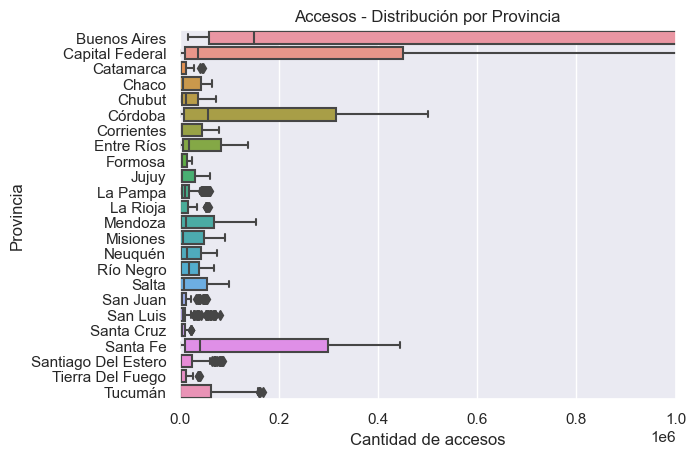

In [42]:
# Se buscan valores atípicos o outliers en la variable numérica a través de un boxplot
sns.boxplot(data = accesos_pcias_tec, x ='Accesos', y = 'Provincia')
plt.xlim(0, 1000000)        # se achican los ejes para mejorar la visualización
plt.xlabel('Cantidad de accesos')
plt.title('Accesos - Distribución por Provincia')
plt.show()

Observamos nuevamente que las jurisdicciones de **Buenos Aires, Capital Federal, Córdoba y Santa Fe** son las que tienen una **mayor dispersión** en sus datos. 

Luego observamos la evolución de los accesos a Internet según las distintas tecnologías con el transcurrir de los años:

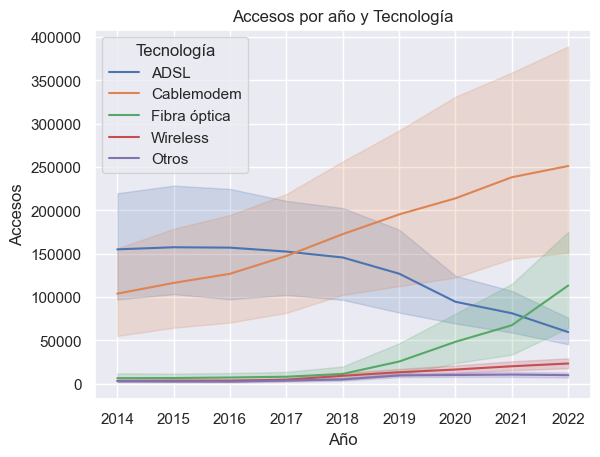

In [43]:
sns.lineplot(data = accesos_pcias_tec, y ='Accesos', x ='Año', hue = "Tecnología")
#plt.ylim(0, 20000)
plt.xlabel('Año') 
plt.title('Accesos por año y Tecnología')
plt.show()

Se observa que las **tecnologías** que **más crecieron** en los últimos años son **Cablemodem** y **Fibra óptica**, mientras que el tipo de conexión **ADSL decrece** de una manera **inversamente proporcional** al **crecimiento de Cablemodem**.

En este punto resulta importante realizar una breve explicación acerca de la diferencia entre cada una de estas tecnologías:

> ADSL (Línea de Abonado Digital Asimétrica):

    * Utiliza líneas de teléfono existentes para transmitir datos a través de un cable de cobre.
    * Ofrece velocidades de descarga más bajas que las otras tecnologías mencionadas, generalmente en el rango de 1 a 20 Mbps.
    * La velocidad de carga suele ser mucho más lenta que la de descarga.
    * La disponibilidad puede ser limitada en áreas rurales o remotas.


> Cablemodem: 

    * Utiliza la infraestructura de cable de televisión existente para proporcionar acceso a Internet.
    * Ofrece velocidades de descarga más rápidas que el ADSL, generalmente en el rango de 10 a 1.000 Mbps (dependiendo del proveedor).
    * La velocidad de carga suele ser más rápida que la de ADSL, pero aún asimétrica.
    * La disponibilidad varía según la ubicación y la cobertura del proveedor de cable.


> Fibra óptica:

    * Utiliza cables de fibra óptica para transmitir datos a través de pulsos de luz.
    * Ofrece velocidades de descarga y carga muy altas, a menudo de 100 Mbps a varios gigabits por segundo (Gbps).
    * La latencia es baja y la calidad de la conexión es generalmente muy alta.
    * La disponibilidad puede ser limitada en algunas áreas, pero las redes de fibra se están expandiendo rápidamente.


> Wireless (Inalámbrica):

    * Utiliza señales de radio para transmitir datos de forma inalámbrica.
    * Puede ser proporcionada a través de tecnologías como Wi-Fi, 4G/5G, y conexiones satelitales.
    * La velocidad y calidad de la conexión inalámbrica pueden variar significativamente según la ubicación, la congestión de la red y la tecnología utilizada.
    * Ofrece la ventaja de la movilidad, pero puede ser menos estable y rápida que las conexiones con cable.



Aunque la **fibra óptica** ha existido durante décadas, su despliegue a gran escala en redes de telecomunicaciones y la expansión de las conexiones de fibra a los hogares ha ocurrido en las últimas dos décadas, y en **Argentina** se observa un notorio **crecimiento** en este tipo de tecnología **a partir del año 2018**. La fibra óptica ha ganado terreno debido a su capacidad para ofrecer velocidades de Internet extremadamente rápidas y una mayor estabilidad.

Luego observamos la cantidad de accesos por tipo de tecnología a cierre del 2022:

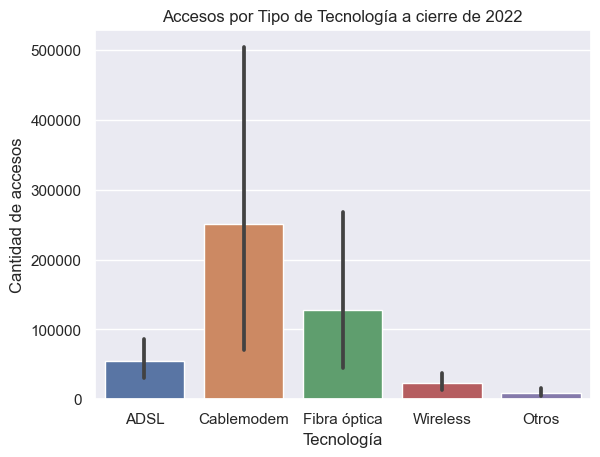

In [44]:
acc_tec_2022 = accesos_pcias_tec[(accesos_pcias_tec["Año"] == 2022) & (accesos_pcias_tec["Trimestre"] == 4)]
sns.barplot(data = acc_tec_2022, x = "Tecnología", y="Accesos")
plt.xlabel('Tecnología')
plt.ylabel('Cantidad de accesos') 
plt.title('Accesos por Tipo de Tecnología a cierre de 2022')
plt.show()

Una vez más observamos que al **cierre de 2022**, las **dos principales tecnologías** utilizadas son también **Cablemodem** y **Fibra óptica** con una gran dispersión en sus valores en función a la provincia de la que se trate.

In [45]:
# Por último, se exporta el dataset modificado a un archivo "csv"
accesos_pcias_tec.to_csv("Accesos_Pcias_Tecnología.csv")

## Accesos por Rango de Velocidad - Provincias

In [46]:
acc_rangosvel_pcia = pd.read_excel(r"Datasets/Internet_Accesos_Velocidad.xlsx", sheet_name="Accesos_Velocidad")
print(acc_rangosvel_pcia.shape)
acc_rangosvel_pcia.head()

(864, 12)


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0


> Este dataset incluye información sobre los **accesos a Internet** de acuerdo a **rangos de velocidad de descarga**, por Provincia y por Trimestre, desde el año 2014 al 2022.

In [47]:
# Se controlan características generales del dataset:
acc_rangosvel_pcia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    float64
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    float64
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 81.1+ KB


In [48]:
# Se controla si existen valores faltantes:
acc_rangosvel_pcia.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [49]:
# Se controla cuales son los valores faltantes en "OTROS":
acc_rangosvel_pcia[acc_rangosvel_pcia['OTROS'].isnull()]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
337,2019,2,Capital Federal,74.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
347,2019,2,La Rioja,9.0,11.0,39819.0,4297.0,4857.0,13.0,1298.0,NaN,50304.0
348,2019,2,Mendoza,20.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
355,2019,2,Santa Cruz,25.0,84.0,24861.0,3806.0,1202.0,28.0,4.0,NaN,30010.0
358,2019,2,Tierra Del Fuego,6.0,123.0,41824.0,4241.0,1573.0,96.0,32.0,NaN,47895.0
359,2019,2,Tucumán,16.0,157.0,78891.0,44296.0,24291.0,628.0,18394.0,NaN,166673.0


In [50]:
# Se reemplazan los valores faltantes por cero:
acc_rangosvel_pcia["OTROS"] = acc_rangosvel_pcia["OTROS"].fillna(0)
acc_rangosvel_pcia[acc_rangosvel_pcia["OTROS"].isnull()]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total


In [51]:
# Se controla si existen valores duplicados:
acc_rangosvel_pcia.duplicated().sum()

0

In [52]:
# Se modifica el dataframe para simplificar la visualización:
acc_rangosvel_pcia = acc_rangosvel_pcia.drop(columns= "Total")              # se elimina la columna total
acc_rangosvel_pcia = acc_rangosvel_pcia.melt(id_vars=['Año', 'Trimestre', 'Provincia'],   # se pasan las columnas a filas
                                   var_name='Rango_Velocidad', value_name='Accesos')
acc_rangosvel_pcia.head()

,Año,Trimestre,Provincia,Rango_Velocidad,Accesos
0,2022,4,Buenos Aires,HASTA 512 kbps,28934.0
1,2022,4,Capital Federal,HASTA 512 kbps,516.0
2,2022,4,Catamarca,HASTA 512 kbps,71.0
3,2022,4,Chaco,HASTA 512 kbps,461.0
4,2022,4,Chubut,HASTA 512 kbps,109.0


In [53]:
# Se chequea la info gral del nuevo dataframe:
acc_rangosvel_pcia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              6912 non-null   int64  
 1   Trimestre        6912 non-null   int64  
 2   Provincia        6912 non-null   object 
 3   Rango_Velocidad  6912 non-null   object 
 4   Accesos          6912 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 270.1+ KB


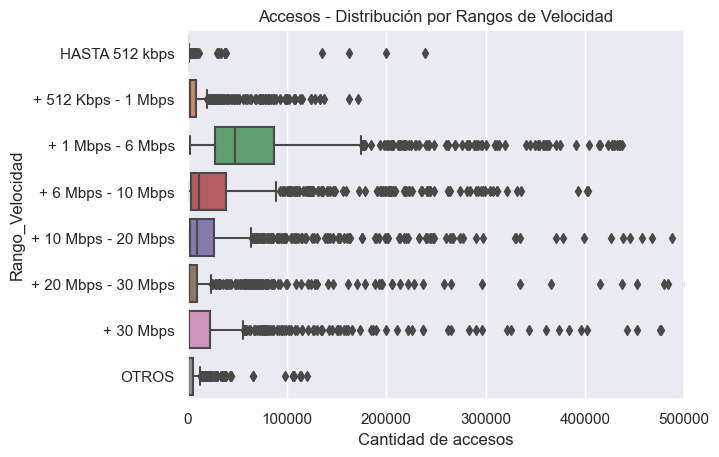

In [54]:
# Se buscan valores atípicos o outliers en la variable numérica a través de un boxplot
sns.boxplot(data = acc_rangosvel_pcia, x ='Accesos', y = 'Rango_Velocidad')
plt.xlim(0, 500000)        # se achican los ejes para mejorar la visualización
plt.xlabel('Cantidad de accesos')
plt.title('Accesos - Distribución por Rangos de Velocidad')
plt.show()

Según se observa en el gráfico anterior, existen muchos puntos por fuera de los boxplot, lo que podría indicar la existencia de outliers, pero como hemos venido comprobando en el presente trabajo, por lo general esos valores se corresponden con los accesos de las grandes jurisdicciones, que no son muchas.

Controlamos la distribución de valores en Capital Federal, para comprobar si presenta valores en todos los rangos de velocidad:

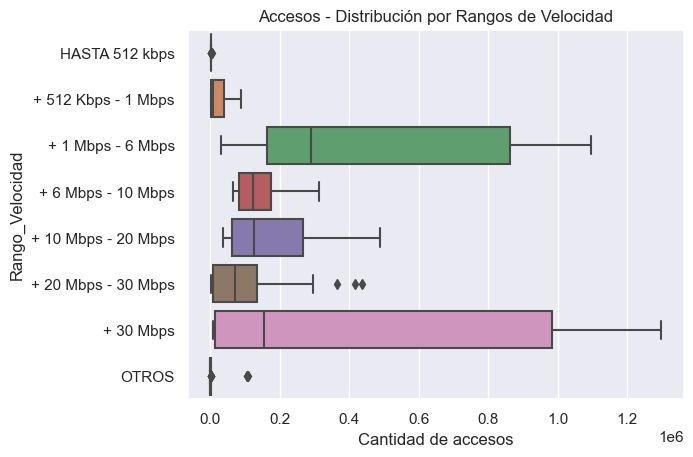

In [55]:
# Filtramos a Capital Federal en el DF:
acc_rangos_CapFed = acc_rangosvel_pcia[acc_rangosvel_pcia["Provincia"] == "Capital Federal"]

# Graficamos:
sns.boxplot(data = acc_rangos_CapFed, x ='Accesos', y = 'Rango_Velocidad')
plt.xlabel('Cantidad de accesos')
plt.title('Accesos - Distribución por Rangos de Velocidad')
plt.show()

Observamos que los rangos con más accesos en Capital Federal son **"+1 Mbps - 6 Mbps"** y **"+30 Mbps"**, pero que también se dan ocurrencias en otras categorías.

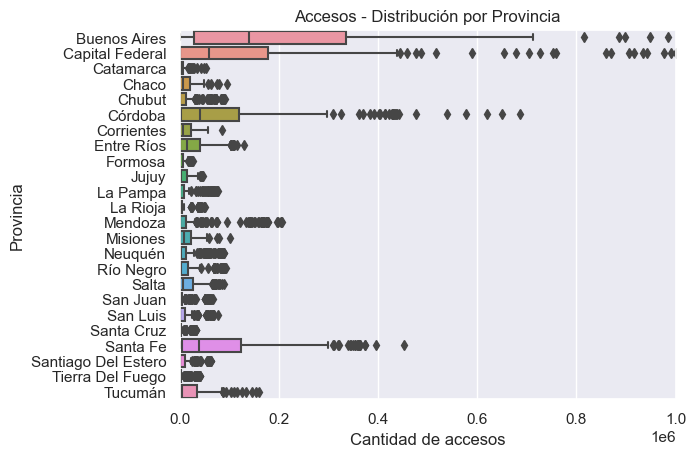

In [56]:
# Vemos la distribución de valores de acuerdo a la Provincia
sns.boxplot(data = acc_rangosvel_pcia, x ='Accesos', y = 'Provincia')
plt.xlim(0, 1000000)        # se achican los ejes para mejorar la visualización
plt.xlabel('Cantidad de accesos')
plt.title('Accesos - Distribución por Provincia')
plt.show()

En este gráfico también observamos valores por fuera de los boxplots, por lo que a continuación consultamos la descripción de las variables numéricas del dataset:

In [57]:
acc_rangosvel_pcia.describe()

,Año,Trimestre,Accesos
count,6912.000000,6912.000000,6.912000e+03
mean,2018.000000,2.500000,4.342574e+04
std,2.582176,1.118115,1.893787e+05
min,2014.000000,1.000000,-1.945000e+03
25%,2016.000000,1.750000,7.100000e+01
50%,2018.000000,2.500000,3.538500e+03
75%,2020.000000,3.250000,2.329225e+04
max,2022.000000,4.000000,3.760109e+06


Se observa que el 75% de los datos está por debajo de los 23.300 accesos, lo cual es un valor muy bajo para las grandes provincias, por lo que los registros de estas pocas provincias podrían constituir los aparentes outliers.

Posteriormente observamos la evolución de los accesos a Internet según rango de Velocidad:

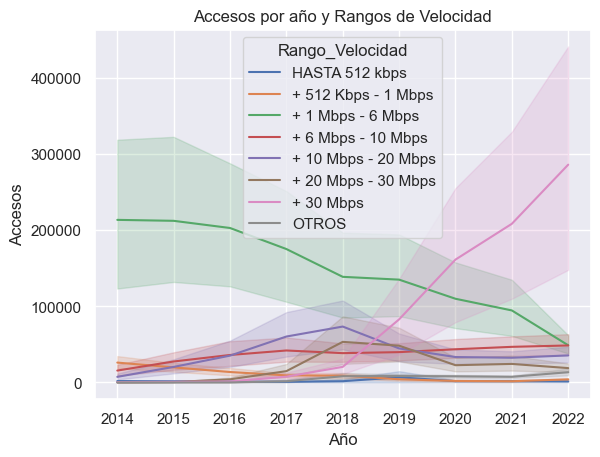

In [58]:
sns.lineplot(data = acc_rangosvel_pcia, y ='Accesos', x ='Año', hue = "Rango_Velocidad")
#plt.ylim(0, 20000)
plt.xlabel('Año') 
plt.title('Accesos por año y Rangos de Velocidad')
plt.show()

En el gráfico anterior se observa claramente una gran **caída** en el **rango** de velocidad de **1 a 6 Mbps**, quien supo concentrar la mayor cantidad de accesos por el 2014, mientas que también se observa un **crecimiento** de los accesos a Internet con un **rango** de velocidad **de +30 Mbps** a partir del **año 2018**, **mismo año** en el que se dió el **crecimiento** de la tecnología de **fibra óptica**, por lo que se entiende que esas velocidades se alcanzan más fácilmente con dicha tecnología.

Luego observamos la cantidad de accesos por rango de velocidad a cierre de 2022:

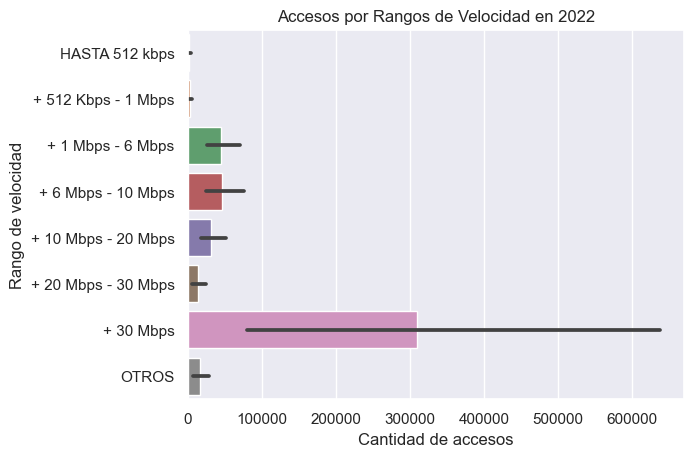

In [59]:
acc_rango_2022 = acc_rangosvel_pcia[(acc_rangosvel_pcia["Año"] == 2022) & (acc_rangosvel_pcia["Trimestre"] == 4)]
sns.barplot(data = acc_rango_2022, y = "Rango_Velocidad", x="Accesos")
plt.ylabel('Rango de velocidad')
plt.xlabel('Cantidad de accesos') 
plt.title('Accesos por Rangos de Velocidad en 2022')
plt.show()

Conformamos que a **cierre** del año **2022**, la gran **mayoría** de los **accesos** a Internet se realizaron a una velocidad de más de 30 Mbps.

In [60]:
# Por último, se exporta el dataset modificado a un archivo "csv"
acc_rangosvel_pcia.to_csv("Accesos_Pcias_RangosVel.csv")

## Velocidad de Bajada por Provincia:

In [61]:
vel_bajada_pcia = pd.read_excel(r"Datasets/Historico_Velocidad.xlsx", sheet_name="Velocidad_Provincia")
print(vel_bajada_pcia.shape)
vel_bajada_pcia.head()

(864, 4)


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


> Este dataset incluye información sobre la **velocidad media de bajada (en Mbps)** por Provincia y por Trimestre, desde el año 2014 al 2022.

In [62]:
# Se controlan características generales del dataset:
vel_bajada_pcia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [63]:
# Se controla si existen valores faltantes:
vel_bajada_pcia.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [64]:
# Se controla si existen valores duplicados:
vel_bajada_pcia.duplicated().sum()

0

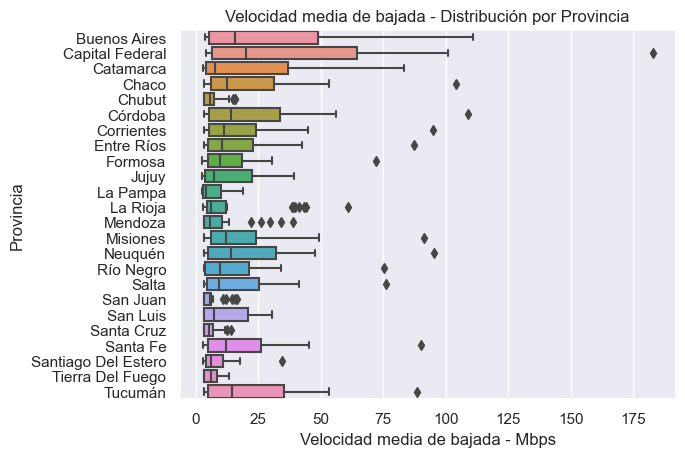

In [65]:
# Se buscan valores atípicos o outliers en la variable numérica a través de un boxplot
sns.boxplot(data = vel_bajada_pcia, x ='Mbps (Media de bajada)', y = 'Provincia')
plt.xlabel('Velocidad media de bajada - Mbps')
plt.title('Velocidad media de bajada - Distribución por Provincia')
plt.show()

De acuerdo a la distribución se observa que **más de la mitad de las provincias** tienen una **velocidad Media de bajada inferior** a los **50 Mbps**, pero que **incluyen valores extremos** que pueden estar incrementando la media a nivel provincia.

Comprobamos con los datos al cierre de 2022:

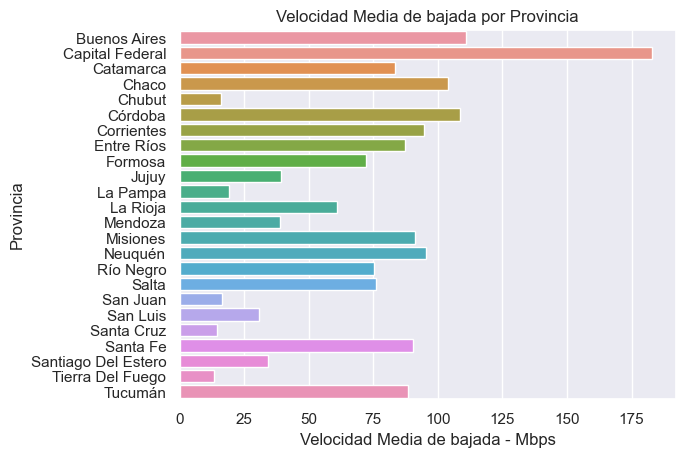

In [66]:
vel_bajada_2022 = vel_bajada_pcia[(vel_bajada_pcia["Año"] == 2022) & (vel_bajada_pcia["Trimestre"] == 4)]
sns.barplot(data = vel_bajada_2022, y = "Provincia", x="Mbps (Media de bajada)")
plt.ylabel('Provincia')
plt.xlabel('Velocidad Media de bajada - Mbps') 
plt.title('Velocidad Media de bajada por Provincia')
plt.show()

Se observa que incluso **a finales** del **2022**, aún existen **9 provincias** con una **Velocidad Media de bajada inferior** a **50 Mbps**.

Luego observamos la evolución de la velocidad media a través de los años:

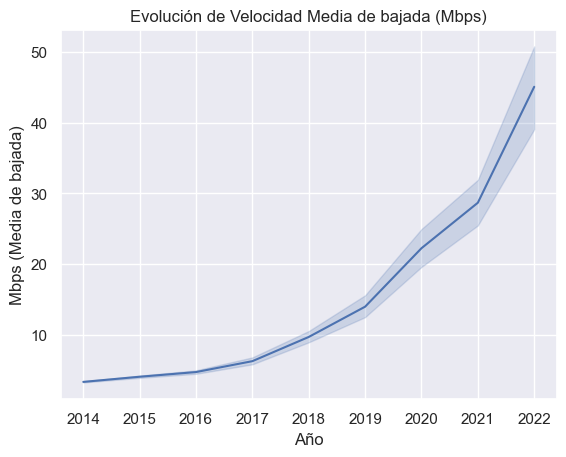

In [67]:
sns.lineplot(data = vel_bajada_pcia, y ='Mbps (Media de bajada)', x ='Año')
plt.xlabel('Año') 
plt.title('Evolución de Velocidad Media de bajada (Mbps)')
plt.show()

Se observa un **crecimiento constante** en la velocidad desde el inicio de la línea de tiempo, pero se hace **más pronunciado** a partir del **2018**, con la **introducción** de la **fibra óptica**.

## Disponibilidad de Tecnologías por Localidad:

In [68]:
tecn_localidad = pd.read_excel(r"Datasets/mapa_conectividad.xlsx", sheet_name="Localidades")
print(tecn_localidad.shape)
tecn_localidad.head()

(4311, 16)


,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,SI,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,--,--,SI,--,--,SI,SI,SI,6588060.0,-35.520141,-60.998949


> Este dataset incluye información acerca de las **tecnologías disponibles por localidad**, como así también la **población y ubicación** de las mismas.

In [69]:
# Se controlan características generales del dataset:
tecn_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.0+ KB


In [70]:
# Se controla si existen valores faltantes:
tecn_localidad.isnull().sum()

Provincia          0
Partido            0
Localidad          0
Población          0
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link              12
Latitud            0
Longitud           0
dtype: int64

In [71]:
# Se controla cuales son los valores faltantes en "Link":
tecn_localidad[tecn_localidad['Link'].isnull()]

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
3112,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Belgrano Ii,0,--,--,--,--,--,--,--,--,--,NaN,-77.874009,-34.626560
3113,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Brown,0,--,--,--,--,--,--,--,--,--,NaN,-64.895348,-62.870538
3114,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Carlini,0,--,--,--,--,--,--,--,--,--,NaN,-62.238369,-58.667544
3115,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Esperanza,0,--,--,--,--,--,--,--,--,SI,NaN,-63.397393,-56.997322
3116,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Marambio,0,--,--,--,--,--,--,--,SI,SI,NaN,-64.240614,-56.625096
3117,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Matienzo,0,--,--,--,--,--,--,--,--,--,NaN,-64.975862,-60.070679
3118,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Orcadas,0,--,--,--,--,--,--,--,--,--,NaN,-60.737817,-44.737660
3119,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base San Martin,0,--,--,--,--,--,--,--,--,--,NaN,-68.130070,-67.101330
3120,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Camara,0,--,--,--,--,--,--,--,--,--,NaN,-62.594350,-59.919054
3121,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Decepcion,0,--,--,--,--,--,--,--,--,--,NaN,-62.975332,-60.698223


Las columnas "Link" y "Partido" no aportan información importante al análisis, por lo que se eliminan del dataframe:

In [72]:
# Se elimina la columna "Link"
tecn_localidad = tecn_localidad.drop(columns=["Link", "Partido"])

# Se vuelven a controlar valores faltantes:
tecn_localidad.isnull().sum()

Provincia         0
Localidad         0
Población         0
ADSL              0
Cablemódem        0
Dial Up           0
Fibra óptica      0
Satelital         0
Wireless          0
Telefonía Fija    0
3G                0
4G                0
Latitud           0
Longitud          0
dtype: int64

In [73]:
# Se observan los valores únicos de la columna provincia:
tecn_localidad["Provincia"].unique()

array(['BUENOS AIRES', 'MENDOZA', 'CABA', 'CATAMARCA', 'CORDOBA',
       'ENTRE RIOS', 'SALTA', 'SANTA CRUZ', 'SANTA FE', 'CHACO',
       'FORMOSA', 'MISIONES', 'SAN JUAN', 'CHUBUT', 'JUJUY', 'NEUQUEN',
       'CORRIENTES', 'RIO NEGRO', 'LA PAMPA', 'SANTIAGO DEL ESTERO',
       'TUCUMAN', 'LA RIOJA', 'SAN LUIS', 'TIERRA DEL FUEGO'],
      dtype=object)

In [74]:
# Se normalizan los nombres de provincias:
tecn_localidad["Provincia"] = tecn_localidad["Provincia"].str.lower()
tecn_localidad["Provincia"] = tecn_localidad["Provincia"].str.capitalize()
tecn_localidad["Provincia"].unique()

array(['Buenos aires', 'Mendoza', 'Caba', 'Catamarca', 'Cordoba',
       'Entre rios', 'Salta', 'Santa cruz', 'Santa fe', 'Chaco',
       'Formosa', 'Misiones', 'San juan', 'Chubut', 'Jujuy', 'Neuquen',
       'Corrientes', 'Rio negro', 'La pampa', 'Santiago del estero',
       'Tucuman', 'La rioja', 'San luis', 'Tierra del fuego'],
      dtype=object)

In [75]:
# Se crea un diccionario con las provincias que se van a reemplazar:
reemplazos = {'Buenos aires':'Buenos Aires','Caba':'Capital Federal', 'Cordoba':'Córdoba', 'Entre rios': 'Entre Ríos', 'Santa cruz':'Santa Cruz',
              'Santa fe':'Santa Fe',  'San juan':'San Juan', 'Neuquen':'Neuquén','Rio negro': 'Río Negro', 'La pampa':'La Pampa', 
               'Santiago del estero': 'Santiago Del Estero', 'Tucuman':'Tucumán','La rioja':'La Rioja', 'San luis': 'San Luis',
               'Tierra del fuego': 'Tierra Del Fuego'}

# Se reemplazan los valores:
tecn_localidad["Provincia"] = tecn_localidad["Provincia"].replace(reemplazos)

Una vez normalizadas las provincias, creamos un dataframe que incluye las Provincias y sus Poblaciones:

In [76]:
provincias = tecn_localidad.groupby("Provincia")["Población"].sum()
provincias

Provincia
Buenos Aires           14911542
Capital Federal         2890151
Catamarca                343343
Chaco                    927414
Chubut                   490554
Corrientes               857994
Córdoba                 3139606
Entre Ríos              1119919
Formosa                  452714
Jujuy                    628141
La Pampa                 302570
La Rioja                 319248
Mendoza                 1654993
Misiones                 836097
Neuquén                  522527
Río Negro                596964
Salta                   1117163
San Juan                 631000
San Luis                 410669
Santa Cruz               268436
Santa Fe                3055611
Santiago Del Estero      671932
Tierra Del Fuego         125823
Tucumán                 1210114
Name: Población, dtype: int64

Creamos la tabla "Provincias", que incluye los datos poblacionales de cada una de ellas:

In [77]:
# Se modifica el dataframe para simplificar la visualización:
tecn_localidad = tecn_localidad.drop(columns = "Población")
tecn_localidad1 = tecn_localidad.melt(id_vars=['Provincia', 'Localidad', 'Latitud', 'Longitud'],   # se pasan las columnas a filas
                                   var_name='Tecnología', value_name='Disponible')
tecn_localidad1.head()

,Provincia,Localidad,Latitud,Longitud,Tecnología,Disponible
0,Buenos Aires,Alfredo Demarchi (Est. Facundo Quiroga),-35.292982,-61.407254,ADSL,SI
1,Buenos Aires,Carlos María Naón,-35.239499,-60.825136,ADSL,--
2,Buenos Aires,Dudignac,-35.651193,-60.709896,ADSL,--
3,Buenos Aires,La Aurora (Est. La Niña),-35.407947,-61.210567,ADSL,--
4,Buenos Aires,Manuel B. Gonnet (Est. French),-35.520141,-60.998949,ADSL,SI


Controlamos valores únicos en la columna "Disponible":

In [78]:
tecn_localidad1["Disponible"].unique()

array(['SI', '--'], dtype=object)

Reemplazamos por 1 y 0 en función a si la localidad posee la tecnología o no:

In [79]:
# Se crea un diccionario con las provincias que se van a reemplazar:
reemp_disp = {'SI': 1, '--': 0}

# Se reemplazan los valores:
tecn_localidad1["Disponible"] = tecn_localidad1["Disponible"].replace(reemp_disp)
tecn_localidad1.head()

,Provincia,Localidad,Latitud,Longitud,Tecnología,Disponible
0,Buenos Aires,Alfredo Demarchi (Est. Facundo Quiroga),-35.292982,-61.407254,ADSL,1
1,Buenos Aires,Carlos María Naón,-35.239499,-60.825136,ADSL,0
2,Buenos Aires,Dudignac,-35.651193,-60.709896,ADSL,0
3,Buenos Aires,La Aurora (Est. La Niña),-35.407947,-61.210567,ADSL,0
4,Buenos Aires,Manuel B. Gonnet (Est. French),-35.520141,-60.998949,ADSL,1


Por último, se exportan los dataframes en Archivos csv para ser utilizados en Power BI:

In [80]:
provincias.to_csv("Provincias.csv")
tecn_localidad1.to_csv("Tecnología_localidades.csv")

# Conclusiones:

De acuerdo al análisis realizado en el presente trabajo, y complementando con las visualizaciones incluidas en el Dashboard de Power BI, se pueden extraer las siguientes conclusiones:

- El índice de accesos cada 100 hogares se incrementó un 90% desde el primer trimestre de 2014 hasta el último de 2022.
- La jurisdicción con mayor índice de accesos cada 100 hogares a cierre de 2022 es Capital Federal, con un valor de 122.73, es decir más de un acceso por hogar.
- Existen provincias como Chaco, Formosa, Santa Cruz y Santiago del Estero donde el índice de accesos aún no supera el 50%.
- Al cierre de 2022, más del 99% de las conexiones se realizan a traves de conexión por Banda Ancha.
- A fines del mismo período, más del 50% de las conexiones se realizan utilizando tecnología de Cablemodem, seguidas por las conexiones de fibra óptica; tecnologías su vez fueron las que más crecieron en los últimos años y que proveen de una velocidad de conexión más rápida.
- El uso de la tecnología ADSL decrece de manera inversamente proporcional al crecimiento de Cablemodem.
- Más del 70% de los accesos se realizan a través de una velocidad superior a los 30 Mbps y la velocidad promedio de descarga a nivel país es de 68.5 Mbps; sin embargo, existen 9 provincias en las cuales la velocidad media de descarga es inferior a 50 Mbps.